# Titanic Dataset

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv") # reading the Titanic dataset csv file
df.head() # observing first 5 rows of the dataset

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3.0,Mr. Owen Harris Braund,male,22.0,1,0.0,7.2500
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0.0,71.2833
2,1,3.0,Miss. Laina Heikkinen,female,26.0,0,0.0,7.9250
3,1,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0.0,53.1000
4,0,3.0,Mr. William Henry Allen,male,35.0,0,0.0,8.0500


In [3]:
df.info() # getting the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   885 non-null    float64
 2   Name                     887 non-null    object 
 3   Sex                      884 non-null    object 
 4   Age                      885 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  886 non-null    float64
 7   Fare                     885 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 55.6+ KB


In [4]:
df.describe() # abstracting all the necessary information from the dataset

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,885.000000,885.000000,887.000000,886.000000,885.000000
mean,0.385569,2.306215,29.490588,0.525366,0.382619,32.360706
std,0.487004,0.836130,14.128195,1.104669,0.807656,49.824698
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.500000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.458300
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# In the dataset, we can see there are 887 passengers. Average age is 29.49 year and ranging from 0.42 to 80.0 year old. Survival rate here is 38%. Minimum fare is 0 and maximum fare is 512.329200

In [6]:
df["Pclass"].unique() # there are 3 unique passanger classes

array([ 3.,  1., nan,  2.])

In [7]:
# Checking the number of missing values of the dataset
df.isnull().sum()

Survived                   0
Pclass                     2
Name                       0
Sex                        3
Age                        2
Siblings/Spouses Aboard    0
Parents/Children Aboard    1
Fare                       2
dtype: int64

<AxesSubplot:>

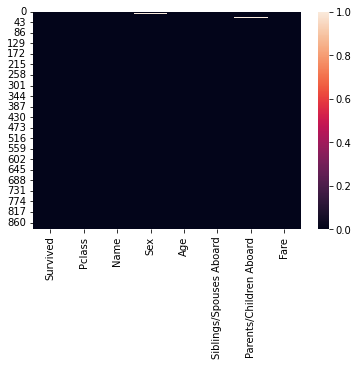

In [8]:
sns.heatmap(df.isnull())

In [9]:
# We can see there are very few missing values in the dataset
# Now we are filling the missing values with some appropriate values

In [10]:
# for Pclass and Sex we are filling the missing values with the mode
df["Pclass"].fillna(value=df["Pclass"].mode()[0], inplace=True)
df["Sex"].fillna(value=df["Sex"].mode()[0], inplace=True)
# for age, Parents/Children Aboard, Fare we are filling the missing values with mean
df["Age"].fillna(value=df["Age"].mean(), inplace=True)
df["Parents/Children Aboard"].fillna(value=df["Parents/Children Aboard"].mean(), inplace=True)
df["Fare"].fillna(value=df["Fare"].mean(), inplace=True)
# Now checking the missing values
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [11]:
# All the missing values are filled

In [12]:
# Finding the correlation between numeric columns (Bivariate analysis)
df.corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.339000,-0.060536,-0.037082,0.080806,0.255368
Pclass,-0.339000,1.000000,-0.386614,0.083826,0.018281,-0.547631
Age,-0.060536,-0.386614,1.000000,-0.298519,-0.193268,0.111599
Siblings/Spouses Aboard,-0.037082,0.083826,-0.298519,1.000000,0.412447,0.158354
Parents/Children Aboard,0.080806,0.018281,-0.193268,0.412447,1.000000,0.215268
Fare,0.255368,-0.547631,0.111599,0.158354,0.215268,1.000000


<AxesSubplot:xlabel='Age', ylabel='Count'>

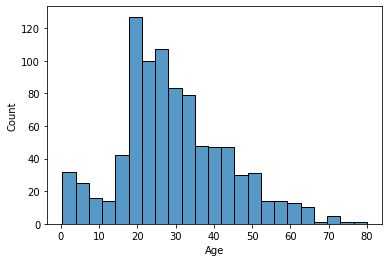

In [13]:
sns.histplot(x="Age", data=df) # Age distribution (maximum people have age between 20 and 35)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

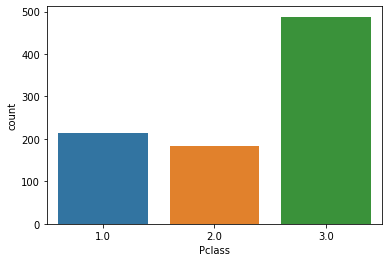

In [14]:
sns.countplot(x="Pclass", data=df) # most of the people are from passenger class 3

<AxesSubplot:xlabel='Sex', ylabel='count'>

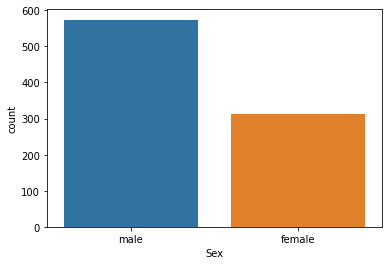

In [15]:
sns.countplot(x="Sex", data=df) # there are more males than females

<AxesSubplot:xlabel='Parents/Children Aboard', ylabel='Count'>

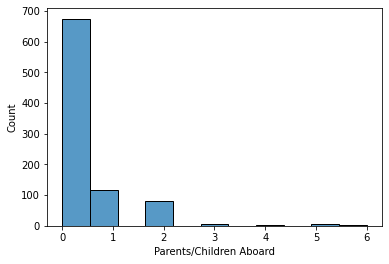

In [16]:
sns.histplot(x="Parents/Children Aboard", data=df) # most of people weren't with their parents or children (single)

<AxesSubplot:xlabel='Siblings/Spouses Aboard', ylabel='Count'>

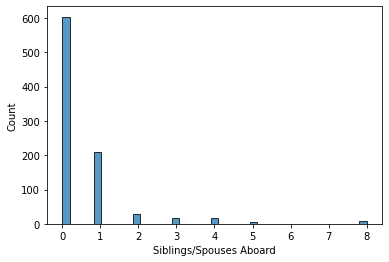

In [17]:
sns.histplot(x="Siblings/Spouses Aboard", data=df) # most of the people came alone

C:\Users\SOUGOTO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

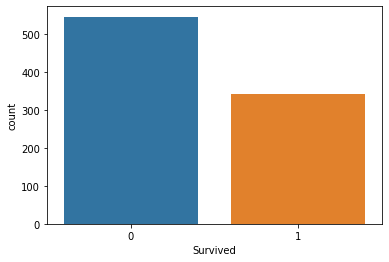

In [18]:
# Investigating how many people survived
sns.countplot("Survived", data=df)

In [19]:
df["Survived"].value_counts() # arround 342 people survived and arround 545 people died

0    545
1    342
Name: Survived, dtype: int64

In [20]:
# more people died in the accident

C:\Users\SOUGOTO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

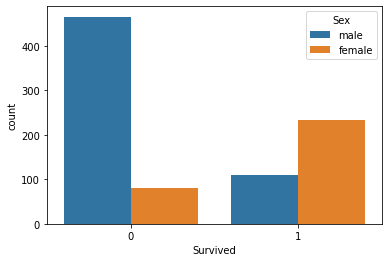

In [21]:
# based on gender how many survived and died?
sns.countplot("Survived", data=df, hue="Sex")

In [22]:
df.groupby("Sex").sum()["Survived"]

Sex
female    233
male      109
Name: Survived, dtype: int64

In [23]:
df["Sex"].value_counts() # there are 574 males and  313 females

male      574
female    313
Name: Sex, dtype: int64

In [24]:
# we can see most of the females are survived (74.44%) and most of the males are died (65.17%)

C:\Users\SOUGOTO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

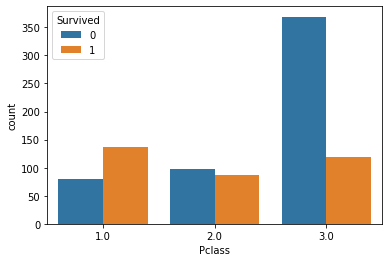

In [25]:
# Now Pclass vs Survived
sns.countplot("Pclass", data=df, hue="Survived")

In [26]:
# We can clearly see that most of the people are from passenger class 3 and maximum people died are from this class. Class 1 passengers have a higher survival chance compared to class 2 and 3.

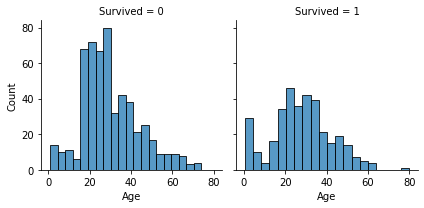

In [27]:
# Age vs Survival
g = sns.FacetGrid(data=df, col="Survived")
g.map(sns.histplot, "Age", bins=20)

In [28]:
# there is a high probability of survival for age < 10 specially for age < 5
# most of the people died had age between 16 to 40
# people having age from 65 to 80 had very low probability of survival
# we can see from the survived = 1 graph most of the young people are survived (left skewed)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

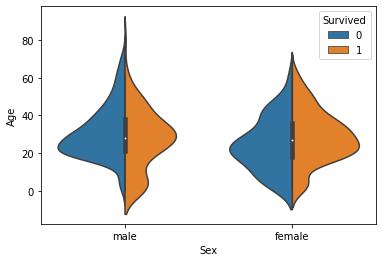

In [29]:
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True) # Age vs Survived vs Sex

In [30]:
# Most of children were survived (specially male)
# More female in the age of range 20 to 60 were survived as compared to male

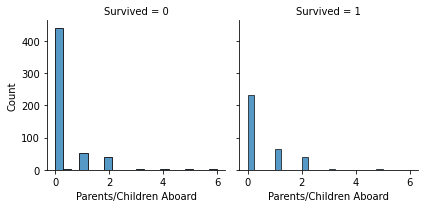

In [31]:
# Parents/Children Aboard vs Survived
g = sns.FacetGrid(data=df, col="Survived")
g.map(sns.histplot, "Parents/Children Aboard", bins=20)

In [32]:
# Most of the passengers died, were not having parents or children (single)

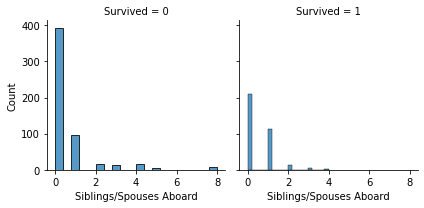

In [33]:
g = sns.FacetGrid(data=df, col="Survived")
g.map(sns.histplot, "Siblings/Spouses Aboard", bins=20)

In [34]:
# Most of the passengers died, were not having siblings or spouse (single)

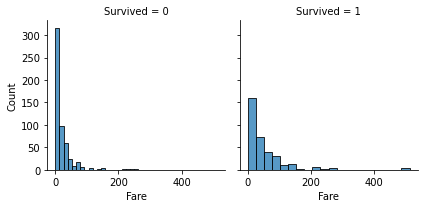

In [35]:
# Fare vs Survived
g = sns.FacetGrid(data=df, col="Survived")
g.map(sns.histplot, "Fare", bins=20)